In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm

In [2]:
filename = "bike-sharing/hour.csv"
rides =pd.read_csv(filename)

In [3]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
rides.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11728,11729,2012-05-08,2,1,5,21,0,2,1,2,0.64,0.6061,0.65,0.2836,21,202,223
3988,3989,2011-06-20,2,0,6,2,0,1,1,1,0.64,0.5758,0.89,0.0896,2,0,2
2547,2548,2011-04-21,2,0,4,1,0,4,1,1,0.52,0.5000,0.45,0.2239,6,20,26
4267,4268,2011-07-01,3,0,7,17,0,5,1,1,0.82,0.6970,0.21,0.1940,99,362,461
17131,17132,2012-12-21,1,1,12,14,0,5,1,2,0.32,0.2879,0.39,0.4478,20,199,219


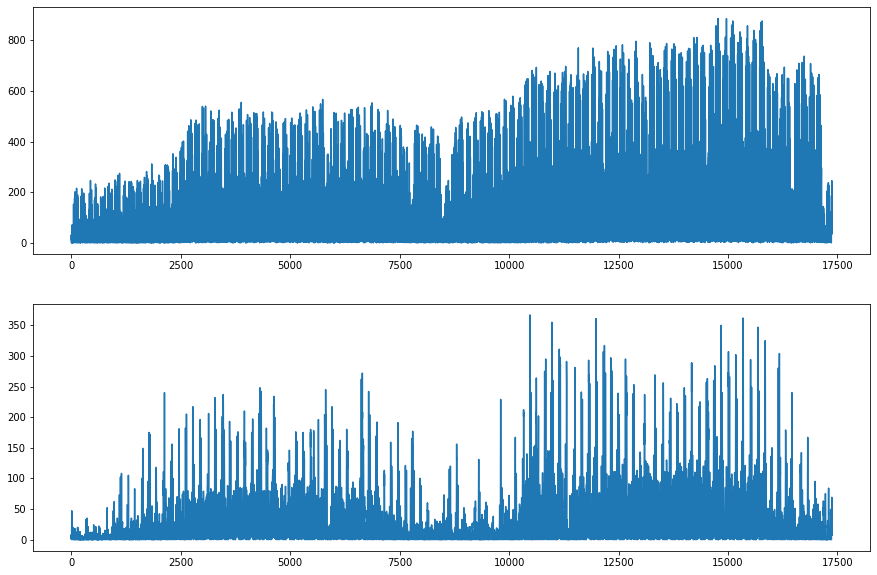

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(15,10))

rides.registered.plot(ax=axes[0])
rides.casual.plot(ax=axes[1])

fig.savefig('output/registered-and-casual.svg',format='svg',dpi=150)#输出

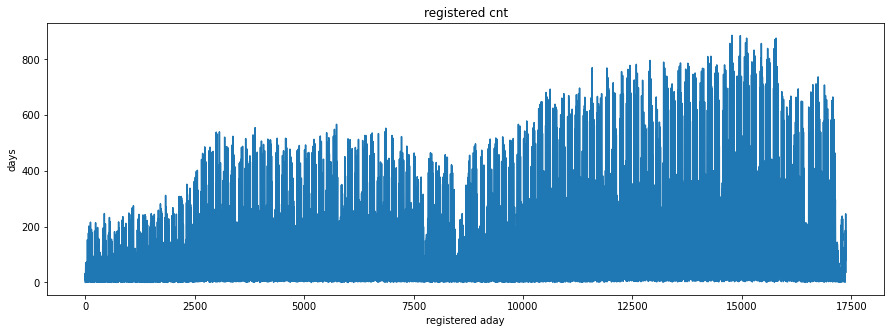

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
plt.title("registered cnt")
plt.xlabel("registered aday")
plt.ylabel("days")
rides.registered.plot(ax=axes)
fig.savefig('output/registeredl.svg',format='svg',dpi=150)

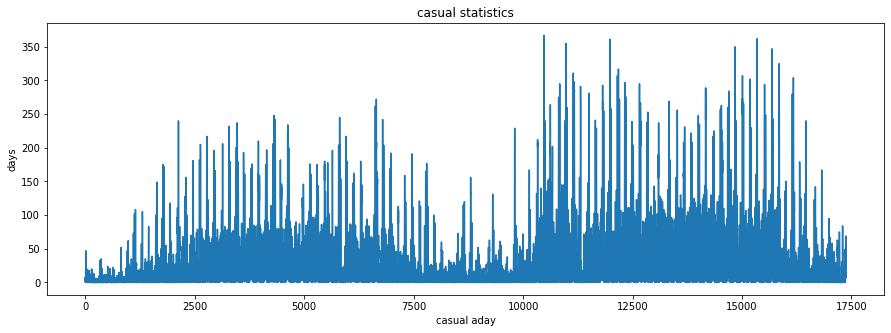

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
plt.title("casual statistics")
plt.xlabel("casual aday")
plt.ylabel("days")
rides.casual.plot(ax=axes)
fig.savefig('output/casual.svg',format='svg',dpi=150)

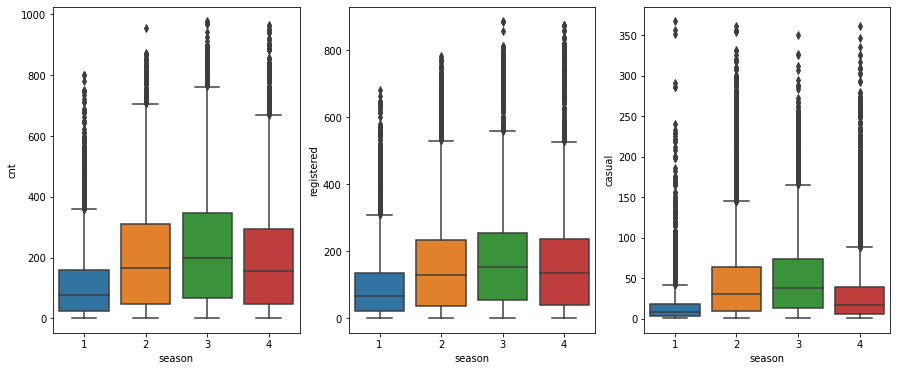

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15,6))

sns.boxplot(y=rides.query("cnt>0")['cnt'], x=rides.season, ax=axes[0])
sns.boxplot(y=rides.query("registered>0")['registered'], x=rides.season, ax=axes[1])
sns.boxplot(y=rides.query("casual>0")['casual'], x=rides.season, ax=axes[2])

fig.savefig('output/cnt-registered-casual-season.svg',format='svg',dpi=150)

c:\Users\gotobcn\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


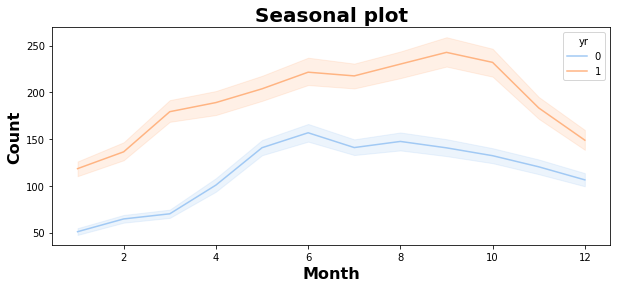

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))

palette = sns.color_palette("pastel", 2)
sns.lineplot(rides['mnth'], rides['registered'], hue=rides['yr'], palette=palette)
ax.set_title('Seasonal plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Count', fontsize = 16, fontdict=dict(weight='bold'))

fig.savefig('output/seanal-cnt-year.svg',format='svg',dpi=150)

c:\Users\gotobcn\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


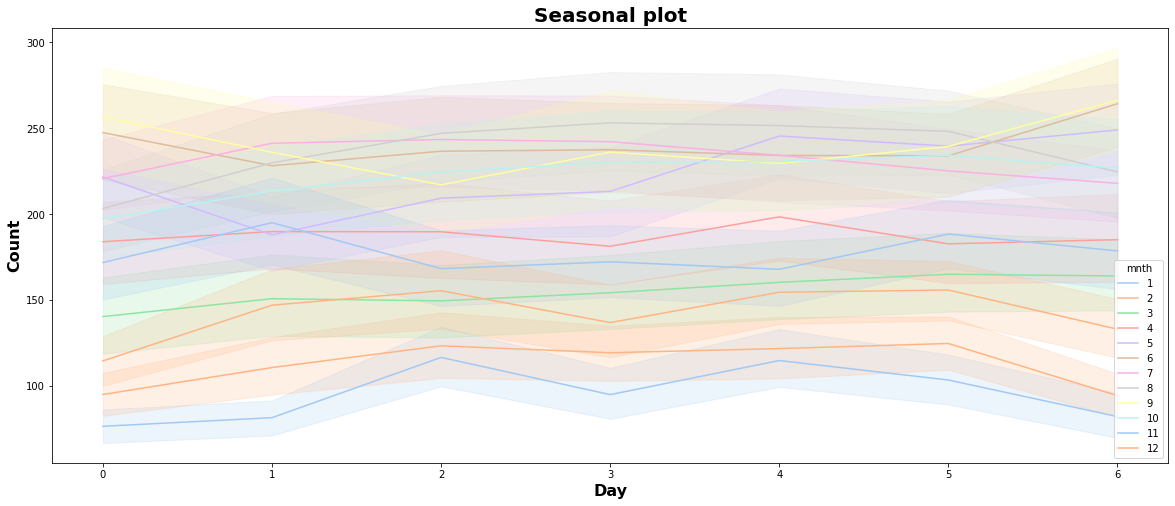

In [41]:
fig, ax = plt.subplots(figsize=(20, 8))

palette = sns.color_palette("pastel", 12)
sns.lineplot(rides['weekday'], rides['cnt'], hue=rides['mnth'], palette=palette)
ax.set_title('Seasonal plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Count', fontsize = 16, fontdict=dict(weight='bold'))

fig.savefig('output/month-weekday-cnt.svg',format='svg',dpi=150)

c:\Users\gotobcn\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


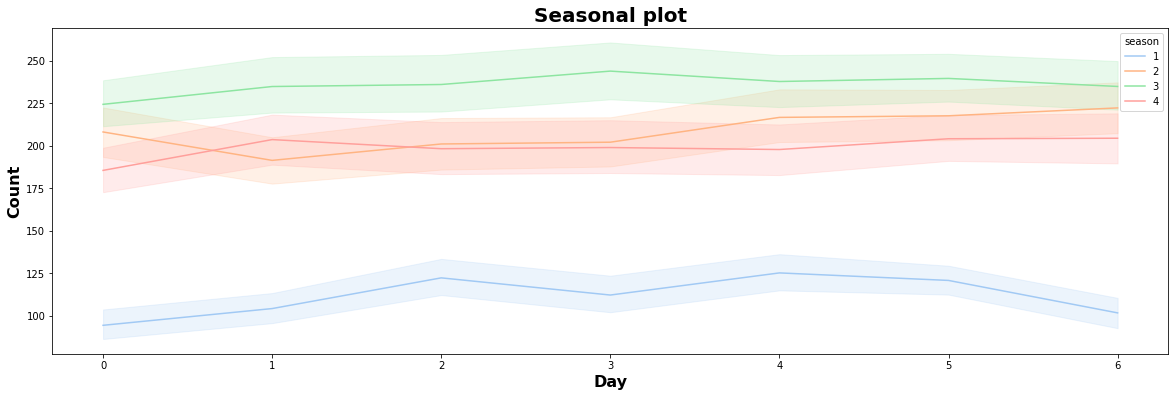

In [21]:
fig, ax = plt.subplots(figsize=(20, 6))

palette = sns.color_palette("pastel", 4)
sns.lineplot(rides['weekday'], rides['cnt'], hue=rides['season'], palette=palette)
ax.set_title('Seasonal plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Count', fontsize = 16, fontdict=dict(weight='bold'))

fig.savefig('output/season-weekday-cnt.svg',format='svg',dpi=150)

c:\Users\gotobcn\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


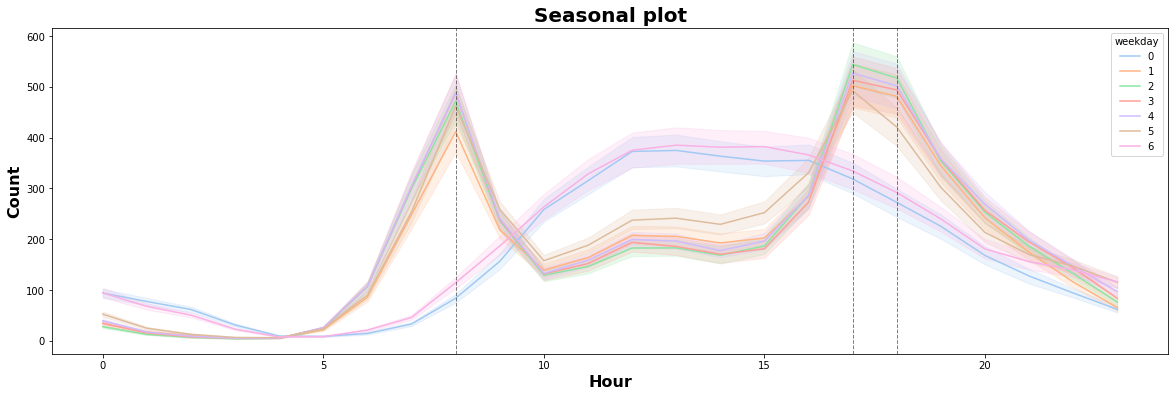

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))
palette = sns.color_palette("pastel", 7)
sns.lineplot(rides['hr'], rides['cnt'], hue=rides['weekday'], palette=palette)
ax.set_title('Seasonal plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Hour', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Count', fontsize = 16, fontdict=dict(weight='bold'))
plt.axvline(x=8, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.axvline(x=17, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.axvline(x=18, color='black', linestyle='--', linewidth=1, alpha=0.5)

fig.savefig('output/day-hour-cnt.svg',format='svg',dpi=150)

c:\Users\gotobcn\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


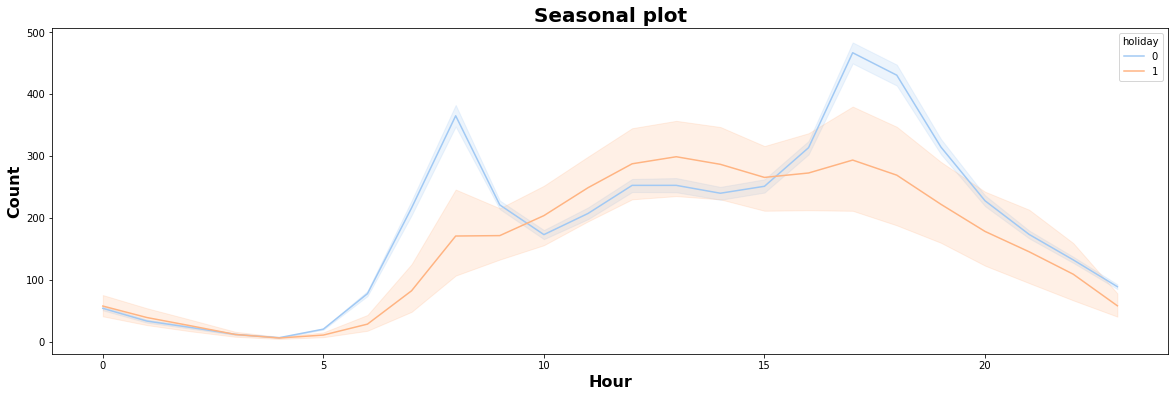

In [24]:
fig, ax = plt.subplots(figsize=(20, 6))

palette = sns.color_palette("pastel", 2)
sns.lineplot(rides['hr'], rides['cnt'], hue=rides['holiday'], palette=palette)
ax.set_title('Seasonal plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Hour', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Count', fontsize = 16, fontdict=dict(weight='bold'))

fig.savefig('output/holiday-hour-cnt.svg',format='svg',dpi=150)

In [31]:
yrmnth = []
for index,row in rides.iterrows():
    yrmnthtemp = row['dteday'][0:7]
    yrmnth.append(yrmnthtemp)

rides.insert(loc=1,column='yrmnth', value=yrmnth)
rides['yrmnth']

ValueError: cannot insert yrmnth, already exists

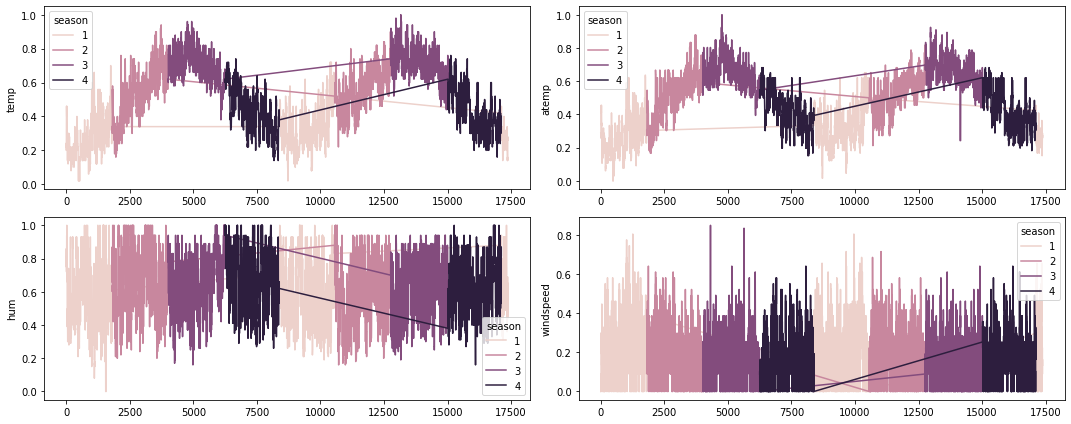

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))

sns.lineplot(x=rides.index, y=rides['temp'], hue=rides.season, ax=axes[0,0])
sns.lineplot(x=rides.index, y=rides['atemp'], hue=rides.season, ax=axes[0,1])
sns.lineplot(x=rides.index, y=rides['hum'], hue=rides.season, ax=axes[1,0])
sns.lineplot(x=rides.index, y=rides['windspeed'], hue=rides.season, ax=axes[1,1])

fig.tight_layout()
fig.savefig('output/cnt-season-fourclues.svg',format='svg',dpi=150)


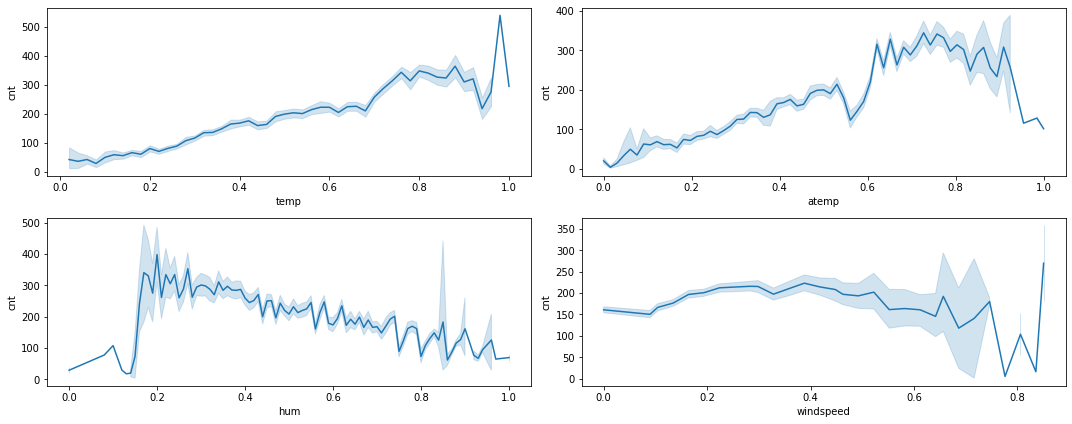

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))
sns.lineplot(y=rides['cnt'], x=rides['temp'], ax=axes[0,0])
sns.lineplot(y=rides['cnt'], x=rides['atemp'], ax=axes[0,1])
sns.lineplot(y=rides['cnt'], x=rides['hum'], ax=axes[1,0])
sns.lineplot(y=rides['cnt'], x=rides['windspeed'], ax=axes[1,1])

fig.tight_layout()

fig.savefig('output/register-cnt-casual-fourclues.svg',format='svg',dpi=150)

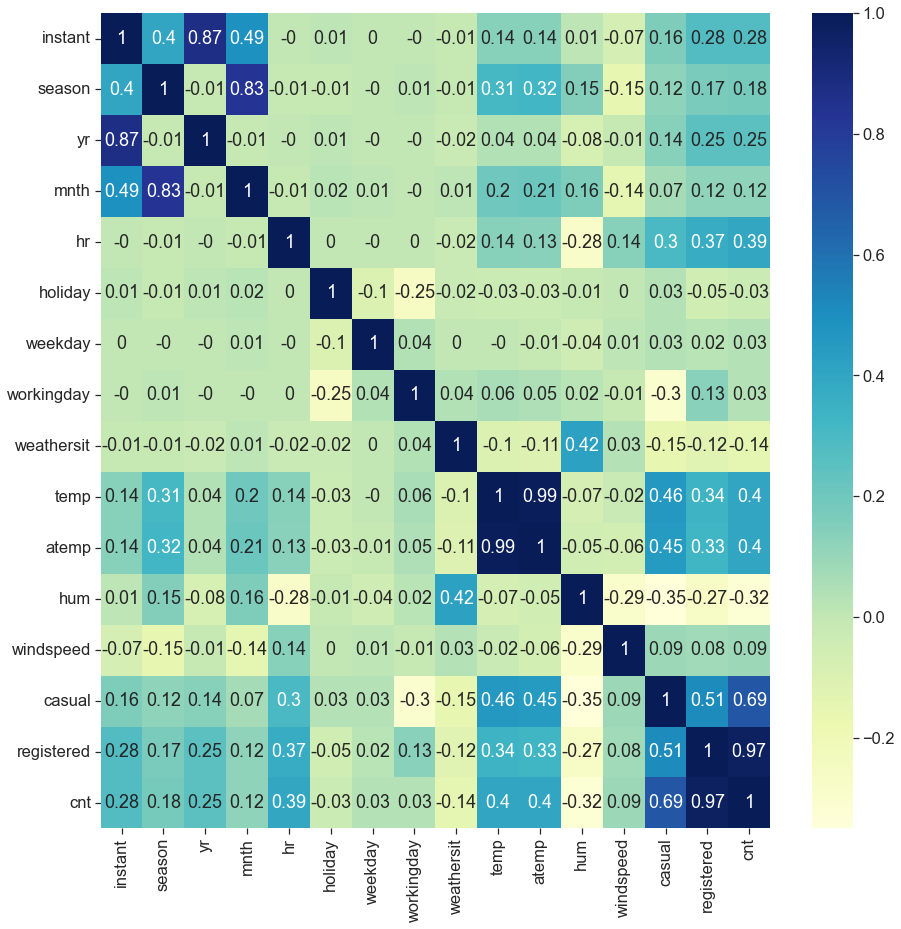

In [9]:
fig = plt.figure(figsize=(15,15))

corrMatrix = rides.corr()
sns.set(context='notebook', style='ticks', font_scale=1.5)
sns.heatmap(round(corrMatrix,2), annot=True, cmap="YlGnBu")
fig.savefig('output/corr.svg',format='svg',dpi=150)

In [42]:
pip list

Package                      Version     
---------------------------- ------------
absl-py                      1.2.0       
astunparse                   1.6.3       
backcall                     0.2.0       
branca                       0.5.0       
cachetools                   5.2.0       
certifi                      2022.6.15   
charset-normalizer           2.1.1       
colorama                     0.4.5       
cycler                       0.11.0      
debugpy                      1.6.2       
decorator                    5.1.1       
entrypoints                  0.4         
flatbuffers                  2.0.7       
folium                       0.12.1.post1
fonttools                    4.37.1      
gast                         0.4.0       
google-auth                  2.11.0      
google-auth-oauthlib         0.4.6       
google-pasta                 0.2.0       
grpcio                       1.48.1      
h5py                         3.7.0       
idna                         3.3  

You should consider upgrading via the 'python -m pip install --upgrade pip' command.
